# JLeague EDA Sample
- JLeagueデータについて概要を把握する(追加データは使用しない)
- サンプルなので単変数に着目(複数変数の組合せは考慮しない)
- 目的変数と説明変数の組合せは確認する
- サンプルなので網羅的にはみない

## Import

In [ ]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

## Setting

In [ ]:
# Path
input_path = "../input_data/"

# Figure Size
plt.rcParams["figure.figsize"] = (20.0, 10.0)

# Set Display Max Columns
pd.set_option("display.max_columns", 50)

# Set Display Max Rows
pd.set_option("display.max_rows", 200)

## Read Data

In [ ]:
train = pd.read_csv(input_path + "jleague/train.csv", sep=",", header=0, quotechar="\"")
test = pd.read_csv(input_path + "jleague/test.csv", sep=",", header=0, quotechar="\"")
condition = pd.read_csv(input_path + "jleague/condition.csv", sep=",", header=0, quotechar="\"")
stadium = pd.read_csv(input_path + "jleague/stadium.csv", sep=",", header=0, quotechar="\"")

In [ ]:
train.shape

(1721, 11)

In [ ]:
test.shape

(313, 10)

In [ ]:
condition.shape

(2034, 31)

In [ ]:
stadium.shape

(59, 3)

## Merge Data
### Train and Test

In [ ]:
dat = pd.concat([train, test], axis=0)
dat["data"] = dat["y"].apply(lambda x: "Test" if np.isnan(x) else "Train")

In [ ]:
#　行数
dat.shape

(2034, 12)

### condition

In [ ]:
dat = pd.merge(dat, condition, how="inner", on="id")

In [ ]:
# 行が減っていないか確認
dat.shape

(2034, 42)

### stadium

In [ ]:
stadium.head()

,name,address,capa
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000
1,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576


In [ ]:
dat = pd.merge(dat, stadium, how="inner", left_on="stadium", right_on="name")

In [ ]:
# 行が減っていないか確認
dat.shape

(2034, 45)

　データ数が少ないのでシンプルなモデルが良さそう.

In [ ]:
# 全て結合したのでデータの頭確認
dat.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,data,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,name,address,capa
0,13994,18250.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,Train,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,ユアテックスタジアム仙台,宮城県仙台市泉区七北田字柳78,19694
1,14012,11831.0,2012,Ｊ１,第３節第１日,03/24(土),13:03,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）,Train,4,1,曇時々雨,8.9,57%,東城 穣,ベガルタ仙台,林 卓人,菅井 直樹,渡辺 広大,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,柳沢 敦,赤嶺 真吾,大宮アルディージャ,北野 貴之,村上 和弘,菊地 光将,金 英權,下平 匠,青木 拓矢,上田 康太,渡邉 大剛,曺 永哲,東 慶悟,ラファエル,ユアテックスタジアム仙台,宮城県仙台市泉区七北田字柳78,19694
2,14031,13147.0,2012,Ｊ１,第５節第１日,04/07(土),14:03,ベガルタ仙台,ジュビロ磐田,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ仙台／ＮＨＫ静岡,Train,2,2,曇,6.1,53%,吉田 寿光,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,ジュビロ磐田,八田 直樹,駒野 友一,チョ ビョングク,藤田 義明,宮崎 智彦,山本 康裕,小林 裕紀,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,ユアテックスタジアム仙台,宮城県仙台市泉区七北田字柳78,19694
3,14055,17192.0,2012,Ｊ１,第７節第１日,04/21(土),19:04,ベガルタ仙台,ＦＣ東京,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ ＢＳ１,Train,4,0,晴,10.4,55%,東城 穣,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,朴 柱成,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,ＦＣ東京,権田 修一,徳永 悠平,森重 真人,チャン ヒョンス,太田 宏介,高橋 秀人,米本 拓司,石川 直宏,大竹 洋平,羽生 直剛,渡邉 千真,ユアテックスタジアム仙台,宮城県仙台市泉区七北田字柳78,19694
4,14075,18525.0,2012,Ｊ１,第１０節第１日,05/06(日),13:04,ベガルタ仙台,清水エスパルス,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ仙台,Train,0,1,曇のち雨,16.9,68%,佐藤 隆治,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,朴 柱成,富田 晋伍,角田 誠,梁 勇基,関口 訓充,太田 吉彰,ウイルソン,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,アレックス,河井 陽介,ジミー フランサ,大前 元紀,高木 俊幸,ユアテックスタジアム仙台,宮城県仙台市泉区七北田字柳78,19694


## Check Data
### 欠損(NA)確認

In [ ]:
# yは結合によりtestで欠損となる, それ以外は欠損なし
dat.isnull().agg("mean")

id             0.000000
y              0.153884
year           0.000000
stage          0.000000
match          0.000000
gameday        0.000000
time           0.000000
home           0.000000
away           0.000000
stadium        0.000000
tv             0.000000
data           0.000000
home_score     0.000000
away_score     0.000000
weather        0.000000
temperature    0.000000
humidity       0.000000
referee        0.000000
home_team      0.000000
home_01        0.000000
home_02        0.000000
home_03        0.000000
home_04        0.000000
home_05        0.000000
home_06        0.000000
home_07        0.000000
home_08        0.000000
home_09        0.000000
home_10        0.000000
home_11        0.000000
away_team      0.000000
away_01        0.000000
away_02        0.000000
away_03        0.000000
away_04        0.000000
away_05        0.000000
away_06        0.000000
away_07        0.000000
away_08        0.000000
away_09        0.000000
away_10        0.000000
away_11        0

　列を順番に確認する.
 ### id

In [ ]:
# idは一意か -> yes
dat["id"].nunique()

2034

### y(単体)

array([[<AxesSubplot:title={'center':'y'}>]], dtype=object)

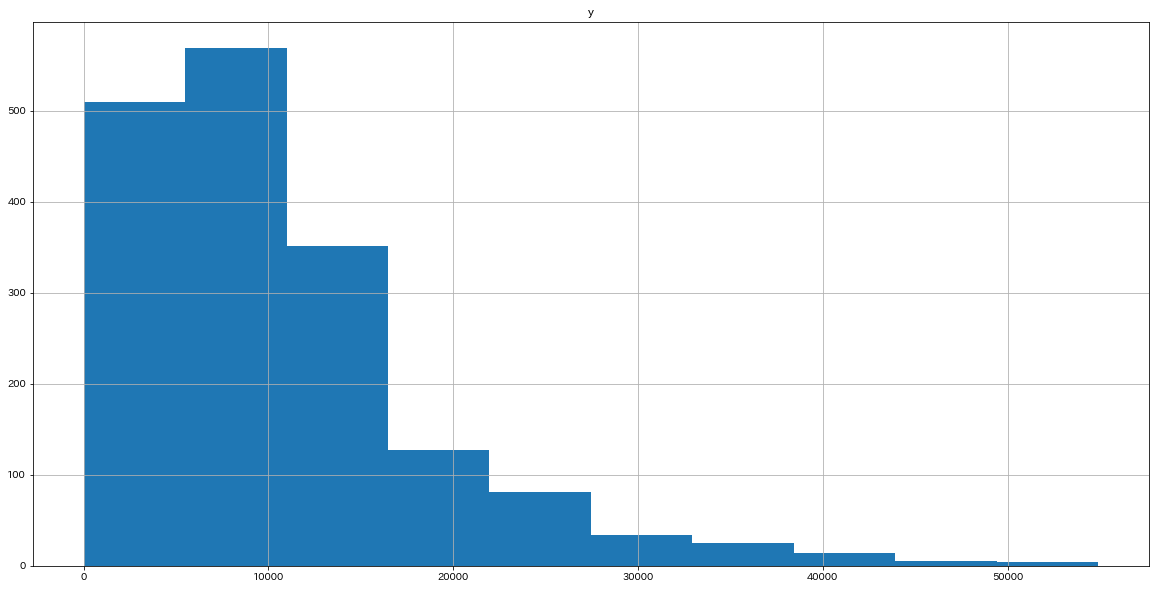

In [ ]:
# 分布
y = dat[dat["data"] == "Train"][["y"]].copy()
y.hist()

In [ ]:
# 四分位数
# 最小値に0があることを発見
y.quantile([0, 0.25, 0.5, 0.75, 1.0])

,y
0.00,0.0
0.25,4750.0
0.50,8650.0
0.75,13431.0
1.00,54905.0


　上記のy=0の試合をデータで確認する.

In [ ]:
# 極端に少ない試合が他にないか1000未満で確認
# 該当する試合は1試合あった, 学習時に注意!
check_y_min = dat[dat["y"] < 1000].copy()
check_y_min

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,data,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,name,address,capa
399,15699,0.0,2014,Ｊ１,第４節第１日,03/23(日),15:04,浦和レッズ,清水エスパルス,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉,Train,1,1,晴,16.2,23%,飯田 淳平,浦和レッズ,西川 周作,阿部 勇樹,那須 大亮,槙野 智章,平川 忠亮,鈴木 啓太,柏木 陽介,宇賀神 友弥,梅崎 司,原口 元気,興梠 慎三,清水エスパルス,櫛引 政敏,石毛 秀樹,平岡 康裕,カルフィン ヨン ア ピン,吉田 豊,河井 陽介,六平 光成,竹内 涼,大前 元紀,ノヴァコヴィッチ,長沢 駿,埼玉スタジアム２００２,埼玉県さいたま市緑区中野田500,63700


### year

<AxesSubplot:xlabel='year', ylabel='count'>

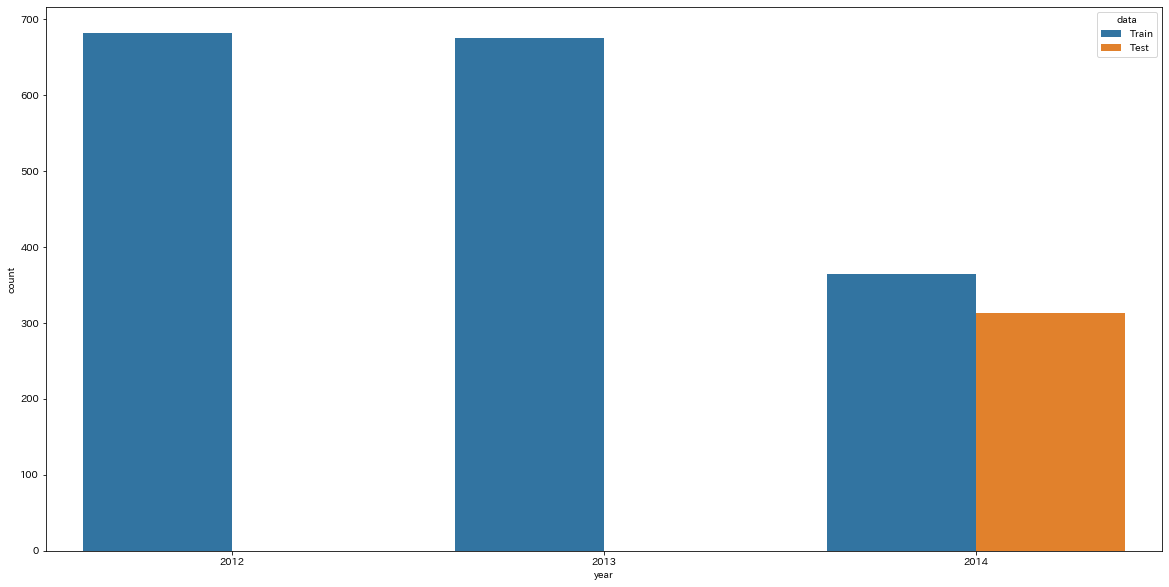

In [ ]:
# 年毎のデータ数(Train, Testも区別)
sns.countplot(x="year", hue="data",data=dat)

In [ ]:
# 数値で確認
dat.groupby(["year", "data"]).agg({"id": "count"})

id
year data      
2012 Train  682
2013 Train  675
2014 Test   313
     Train  364

<AxesSubplot:xlabel='year', ylabel='y'>

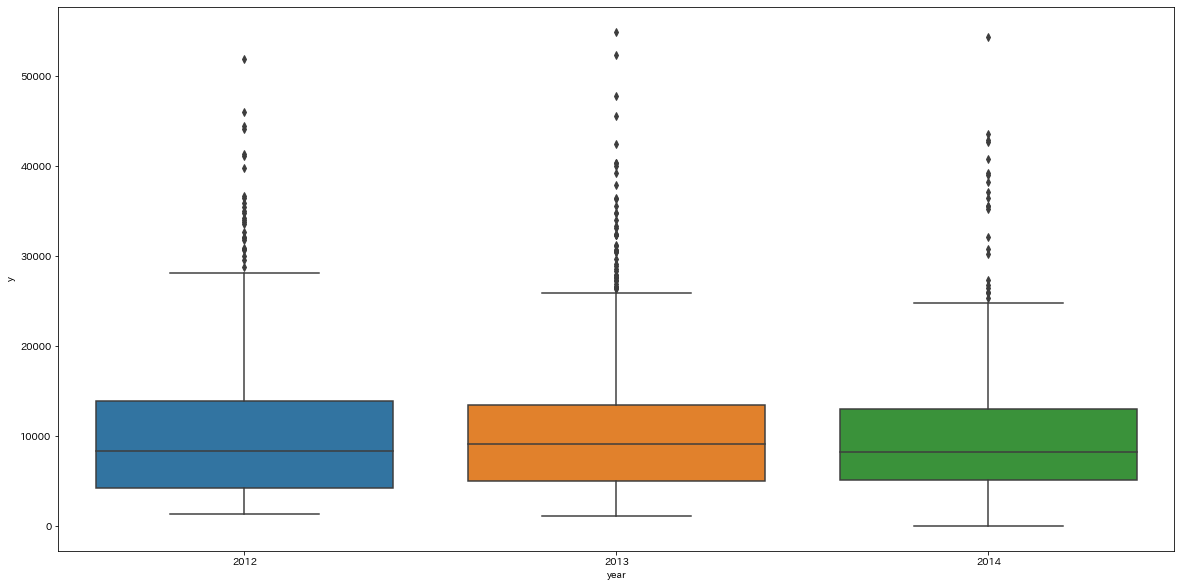

In [ ]:
# 年毎にyの分布を確認
# -> 大きな違いはなさそう
check_y = dat[dat["data"]=="Train"].copy()
sns.boxplot(x="year", y="y", data=check_y)

### stage

<AxesSubplot:xlabel='stage', ylabel='count'>

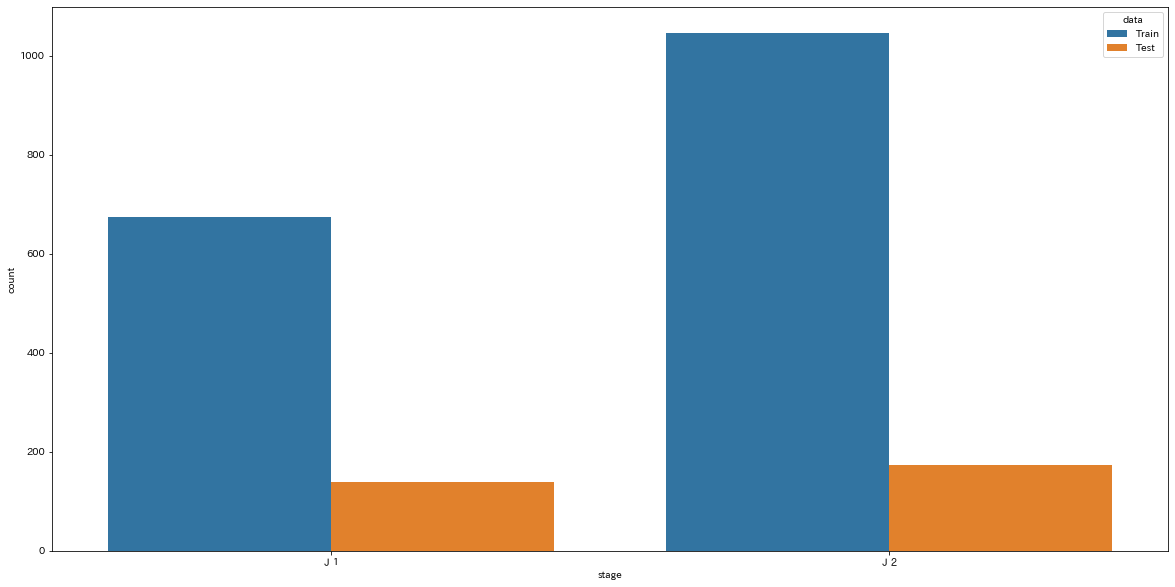

In [ ]:
# stageごとの試合数
# -> J2の試合数が多い
sns.countplot(x="stage", hue="data", data=dat)

In [ ]:
# 数値で確認
dat.groupby(["stage", "data"]).agg({"id": "count"})

id
stage data       
Ｊ１    Test    139
      Train   675
Ｊ２    Test    174
      Train  1046

<AxesSubplot:xlabel='stage', ylabel='y'>

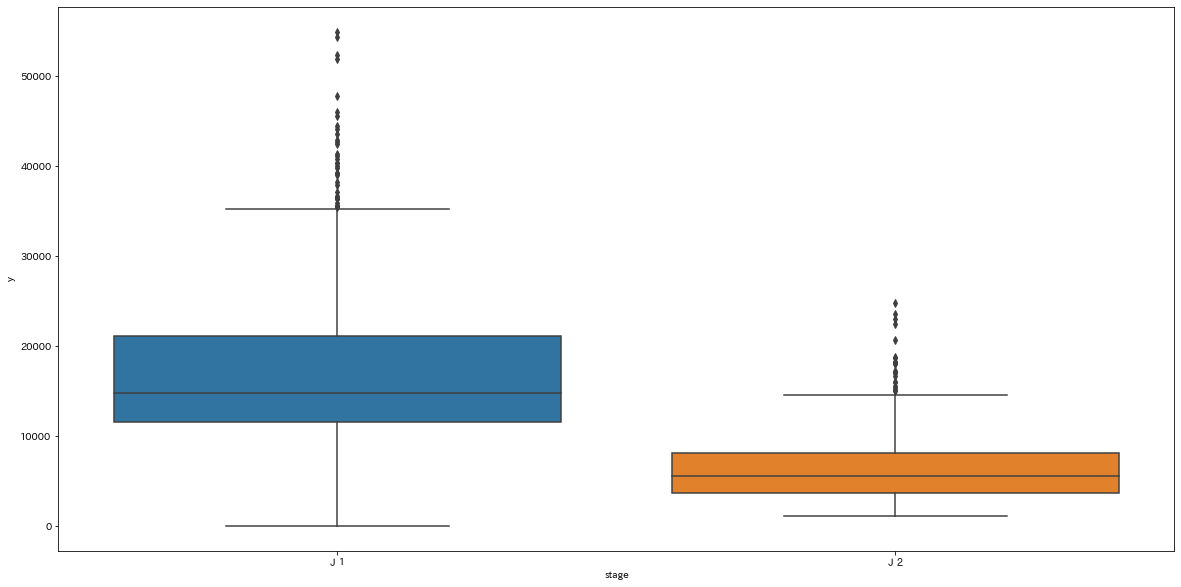

In [ ]:
# 年毎にyの分布を確認
# -> J1とJ2で違いあり
check_y = dat[dat["data"]=="Train"].copy()
sns.boxplot(x="stage", y="y", data=check_y)

### match

In [ ]:
# 節を数値として抽出
dat_match = dat[["match", "y", "data", "stage"]].copy()
dat_match["match_num"] = dat_match["match"].apply(lambda x: int(x.split("節")[0].replace("第", "")))

<AxesSubplot:xlabel='match_num', ylabel='count'>

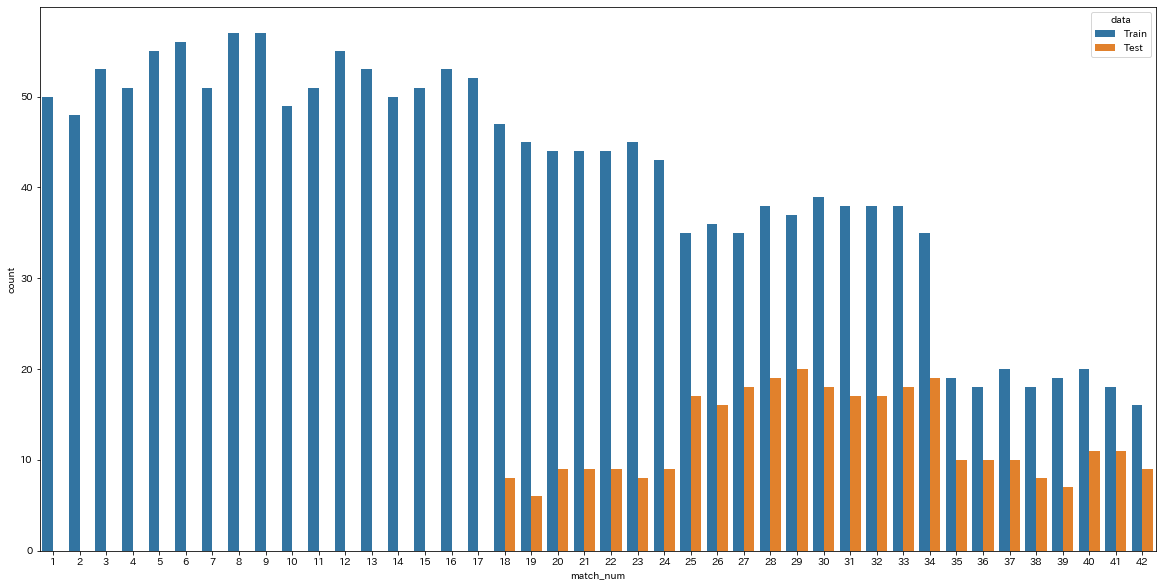

In [ ]:
# 節毎のデータ数(Train, Testも区別)
sns.countplot(x="match_num", hue="data",data=dat_match)

In [ ]:
# 数値で確認
check_match = pd.crosstab(dat_match["match_num"], dat_match["data"])
check_match["sum"] = check_match["Test"] + check_match["Train"]
check_match

data,Test,Train,sum
match_num,,,
1,0,50,50
2,0,48,48
3,0,53,53
4,0,51,51
5,0,55,55
6,0,56,56
7,0,51,51
8,0,57,57
9,0,57,57


<AxesSubplot:xlabel='match_num', ylabel='y'>

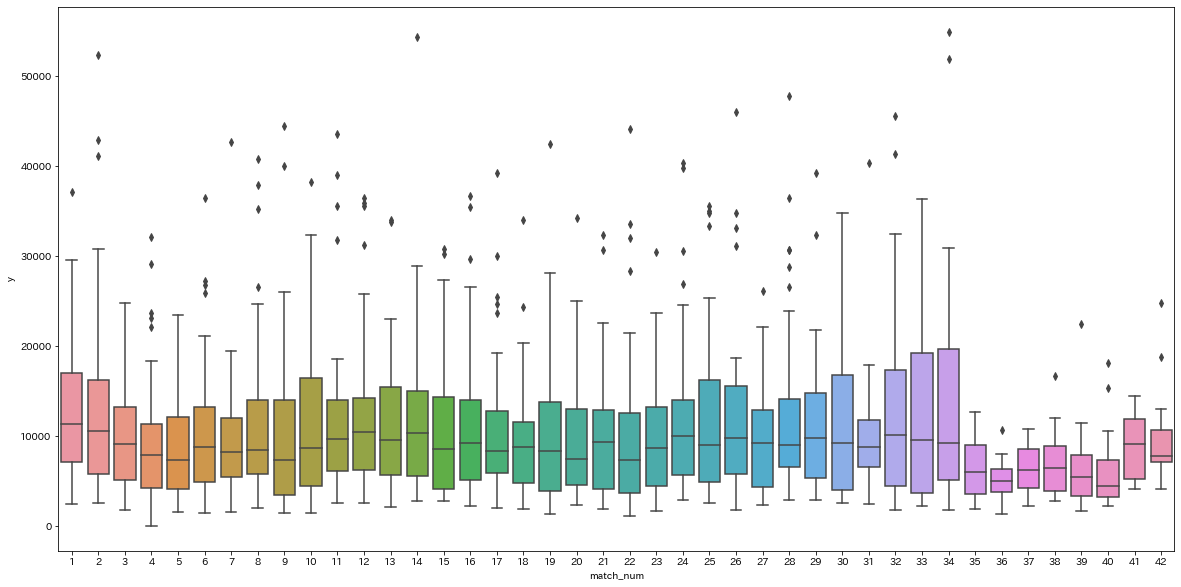

In [ ]:
# match毎にyの分布を確認
# 最初に山場がある？
check_y = dat_match[dat_match["data"]=="Train"].copy()
sns.boxplot(x="match_num", y="y", data=check_y)

<AxesSubplot:xlabel='match_num', ylabel='y'>

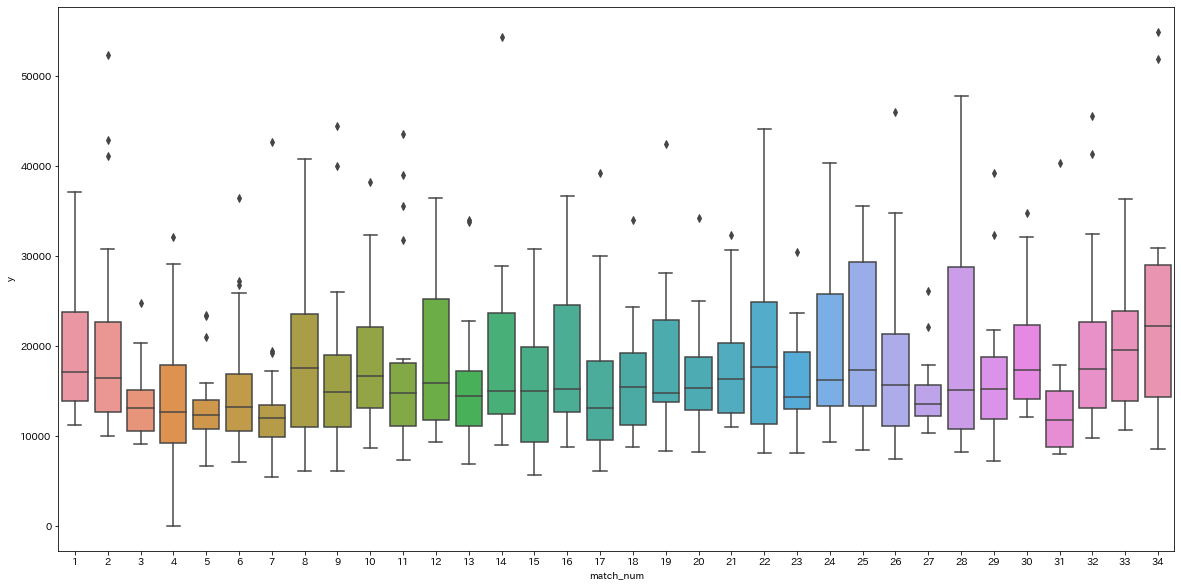

In [ ]:
# stageごとに確認
check_y = dat_match[(dat_match["data"]=="Train") & (dat_match["stage"] == "Ｊ１")].copy()
sns.boxplot(x="match_num", y="y", data=check_y)

<AxesSubplot:xlabel='match_num', ylabel='y'>

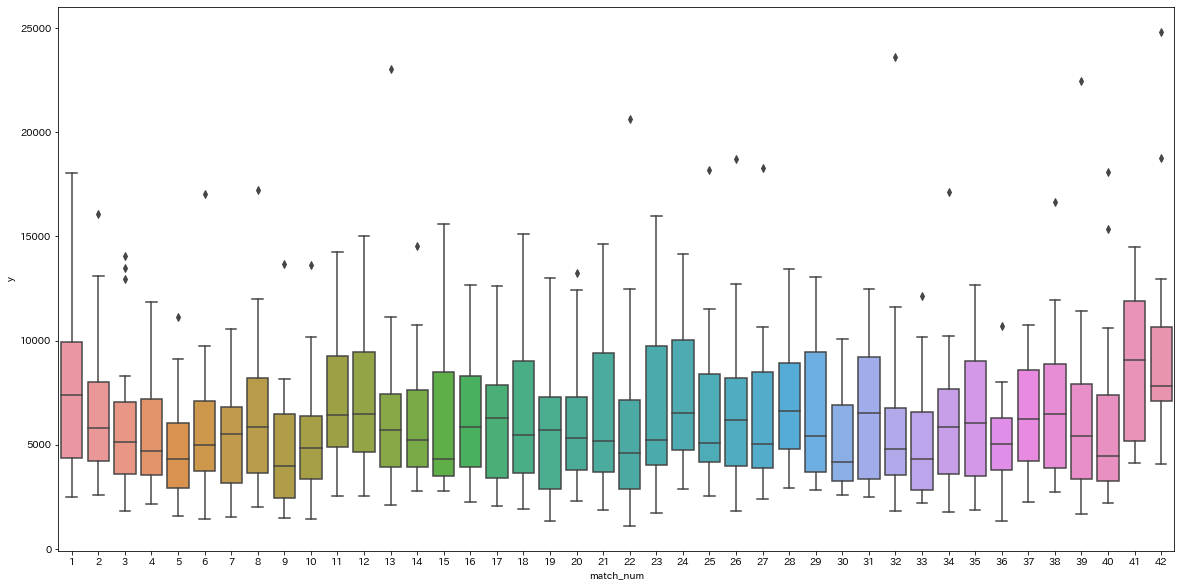

In [ ]:
# stageごとに確認
# J2は最後の方に盛り上がる？
check_y = dat_match[(dat_match["data"]=="Train") & (dat_match["stage"] == "Ｊ２")].copy()
sns.boxplot(x="match_num", y="y", data=check_y)

### gameday

In [ ]:
dat_gameday = dat[["gameday", "y", "data", "stage"]].copy()
dat_gameday["month"] = dat_gameday["gameday"].apply(lambda x: int(x.split("/")[0]))
dat_gameday["day"] = dat_gameday["gameday"].apply(lambda x: int(x.split("/")[1].split("(")[0]))
dat_gameday["day_of_week"] = dat_gameday["gameday"].apply(lambda x: x.split("/")[1].split("(")[1].replace(")", ""))

<AxesSubplot:xlabel='month', ylabel='count'>

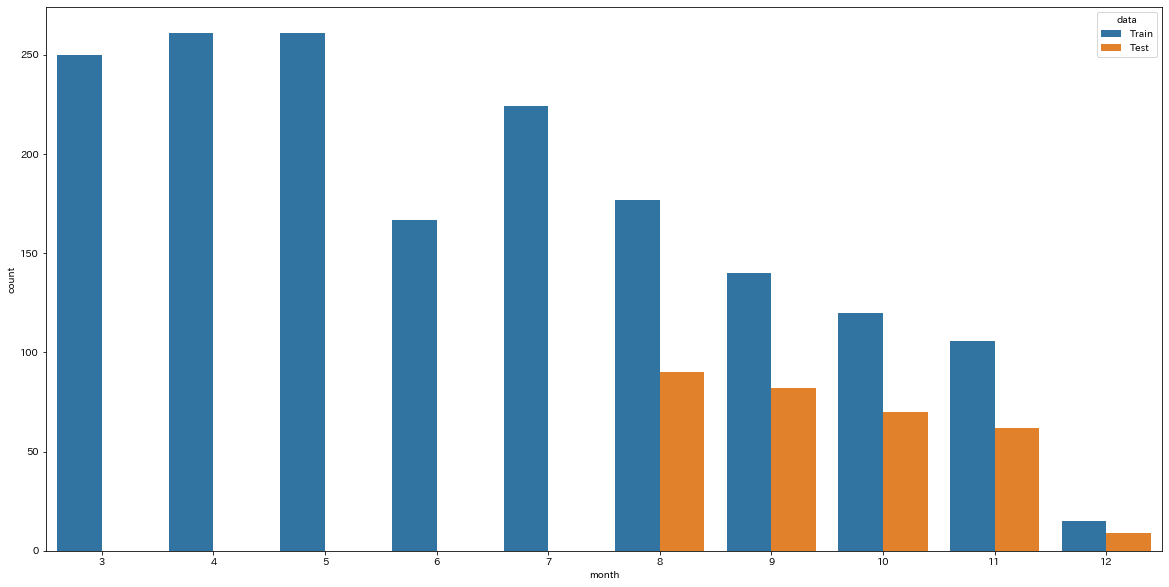

In [ ]:
# 月毎のデータ数(Train, Testも区別)
# -> 12月の試合数は少ない
sns.countplot(x="month", hue="data",data=dat_gameday)

<AxesSubplot:xlabel='month', ylabel='y'>

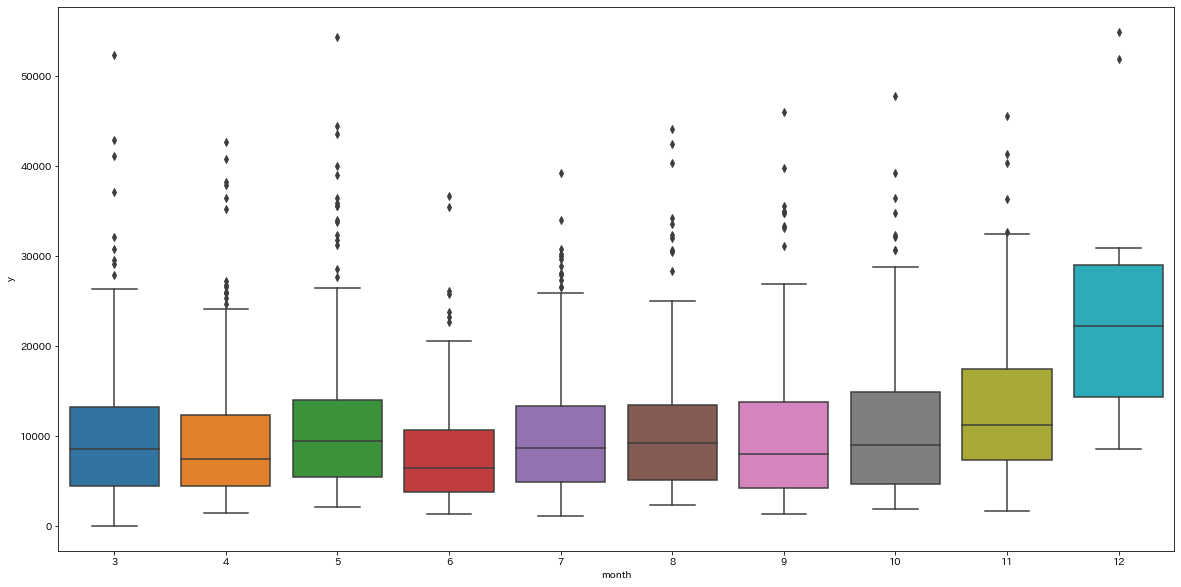

In [ ]:
# 月毎のy
# -> 明らかに12月のyが大きい
check_y = dat_gameday[dat_gameday["data"]=="Train"].copy()
sns.boxplot(x="month", y="y", data=check_y)

<AxesSubplot:xlabel='day_of_week', ylabel='y'>

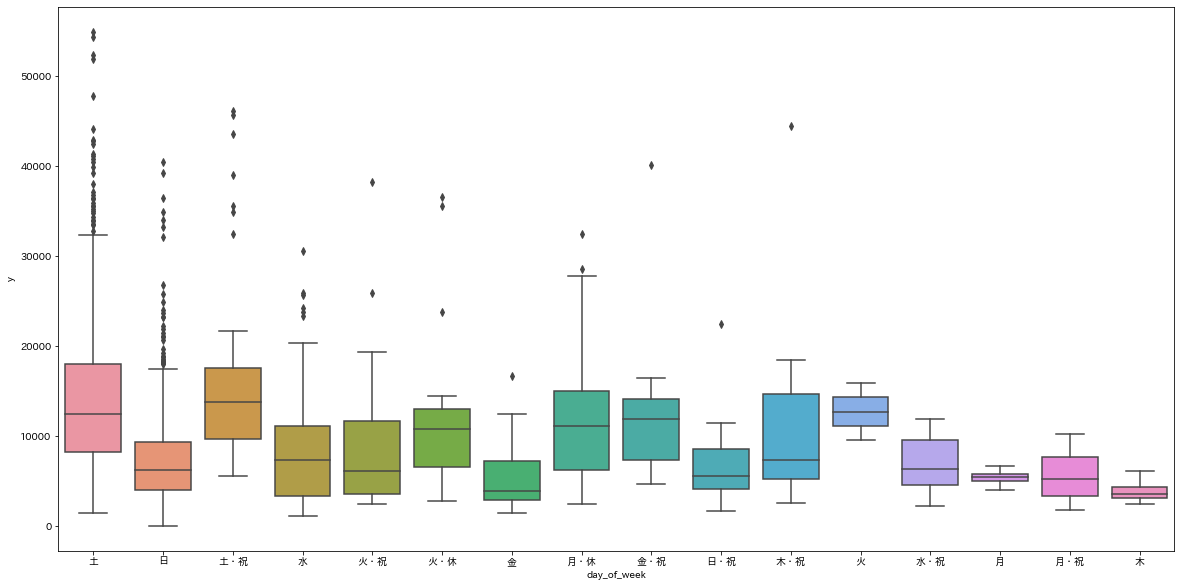

In [ ]:
# 曜日毎のy
# -> 土曜日が多く, 日曜, その他は同じ程度？
check_y = dat_gameday[dat_gameday["data"]=="Train"].copy()
sns.boxplot(x="day_of_week", y="y", data=check_y)

### time

In [ ]:
# 時を数値として抽出
dat_time = dat[["time", "y", "data", "stage"]].copy()
dat_time["time_hour"] = dat_time["time"].apply(lambda x: int(x.split(":")[0]))

<AxesSubplot:xlabel='time_hour', ylabel='count'>

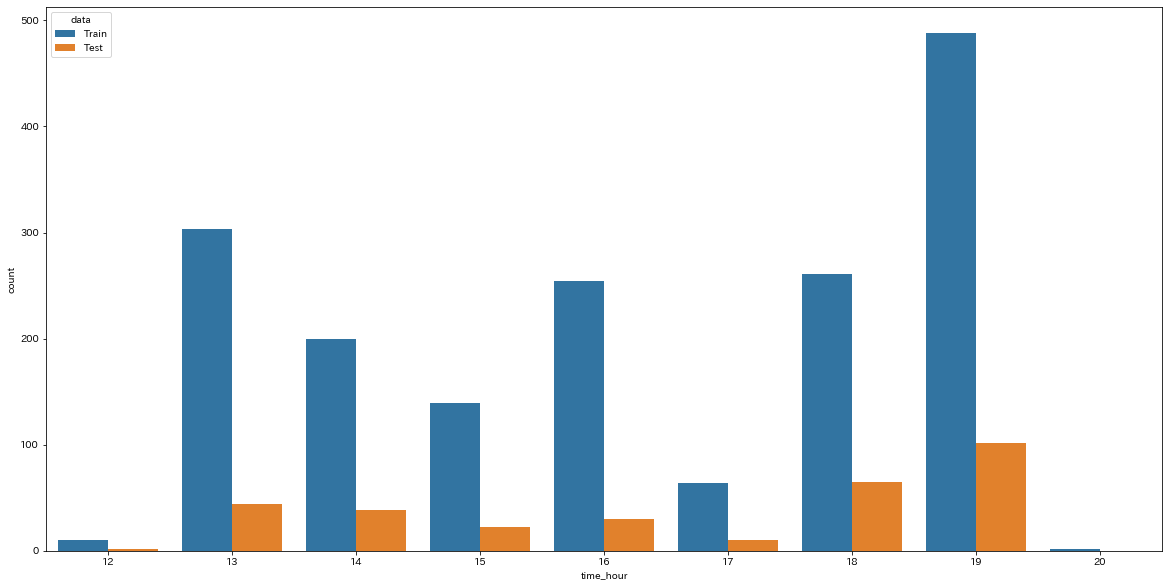

In [ ]:
# 時毎のデータ数(Train, Testも区別)
sns.countplot(x="time_hour", hue="data",data=dat_time)

<AxesSubplot:xlabel='time_hour', ylabel='y'>

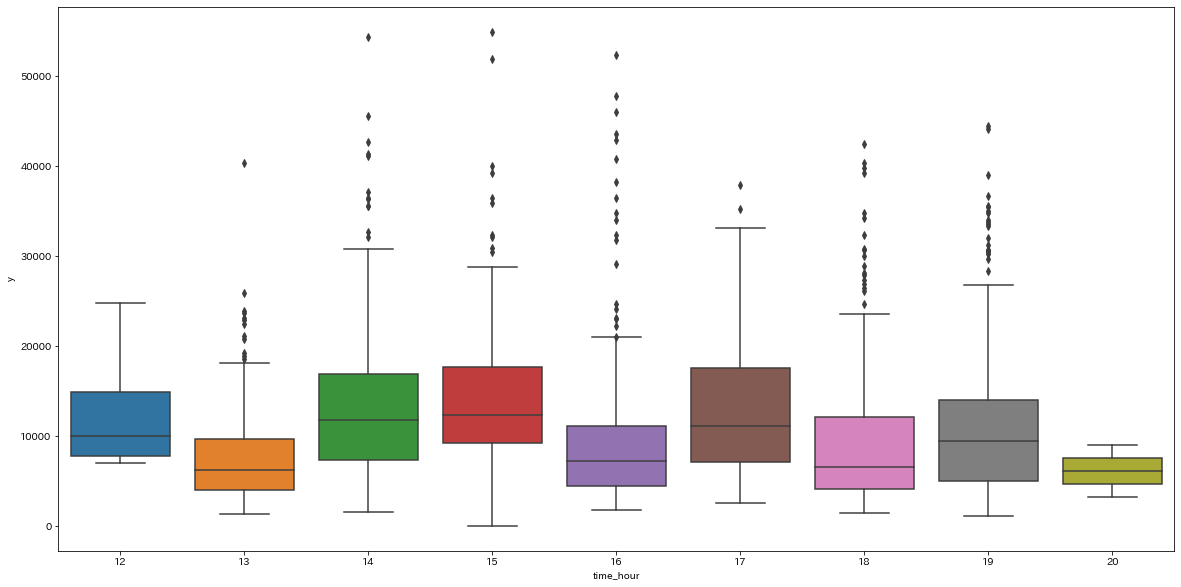

In [ ]:
# 時毎のy
# -> 14, 15, 17時が大きい？
check_y = dat_time[dat_time["data"]=="Train"].copy()
sns.boxplot(x="time_hour", y="y", data=check_y)

### home, away

<AxesSubplot:xlabel='home', ylabel='count'>

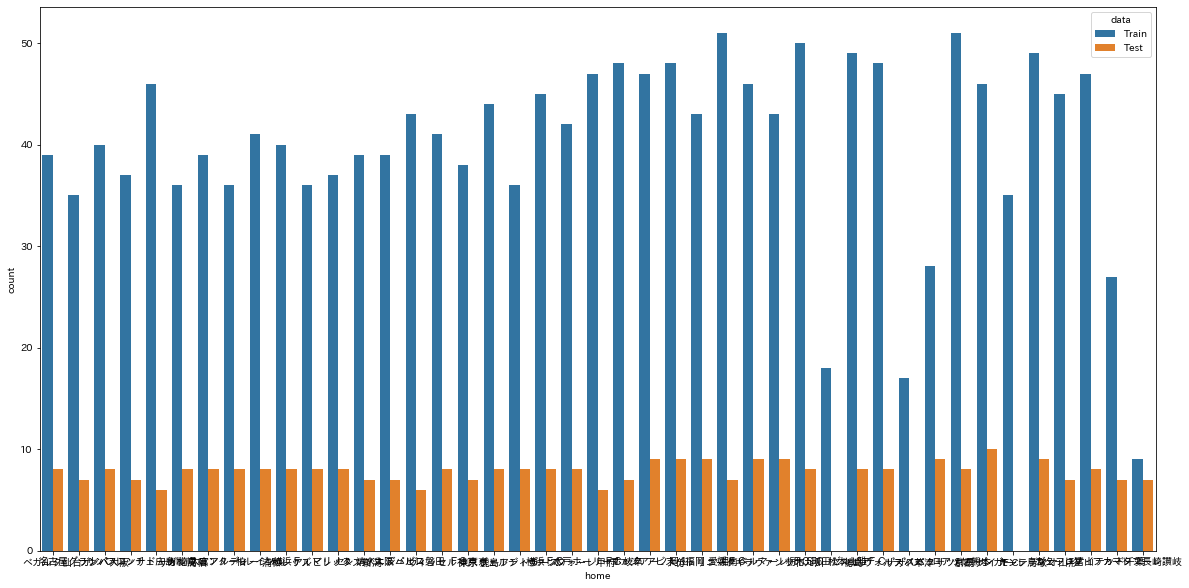

In [ ]:
# home毎のデータ数(Train, Testも区別)
sns.countplot(x="home", hue="data",data=dat)

<AxesSubplot:xlabel='away', ylabel='count'>

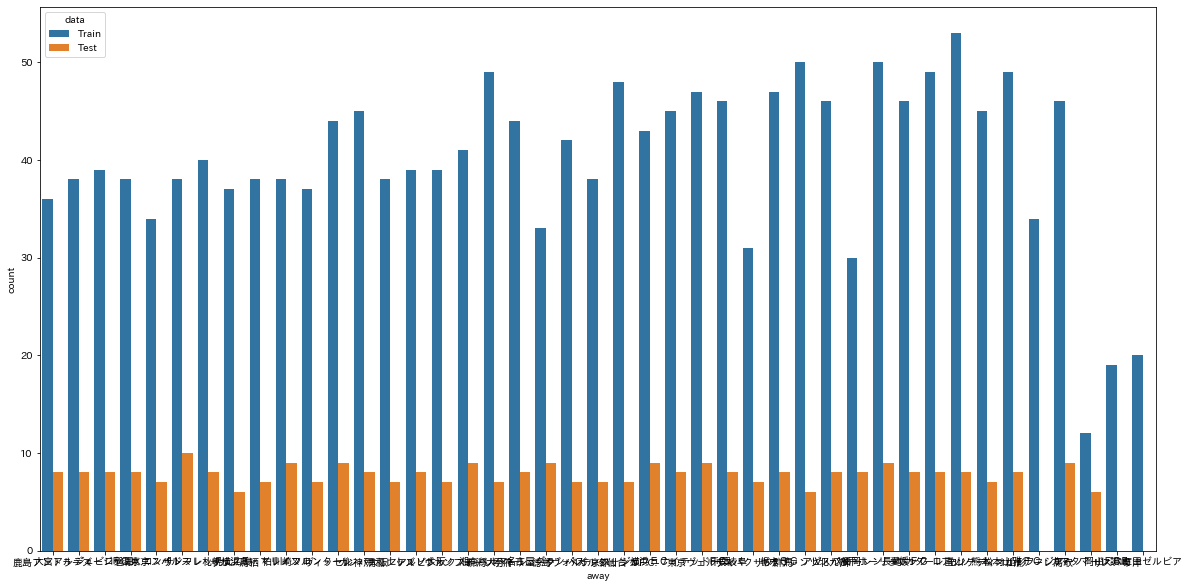

In [ ]:
sns.countplot(x="away", hue="data",data=dat)

<AxesSubplot:xlabel='home', ylabel='y'>

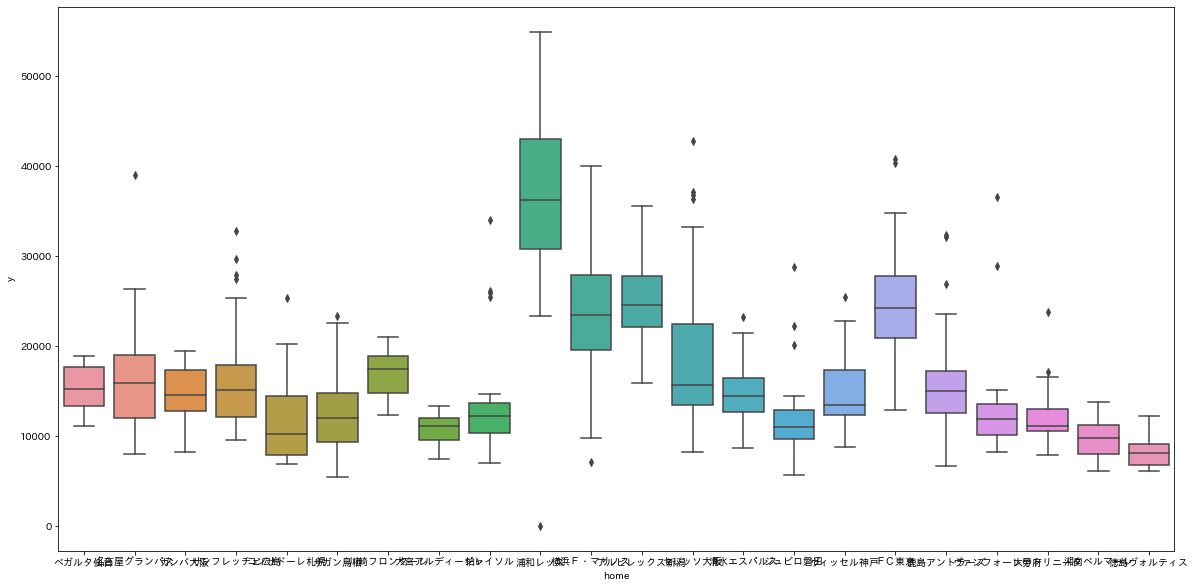

In [ ]:
# home(J1)毎のy
# -> 浦和レッズが大きい,
check_y = dat[(dat["data"]=="Train") & (dat["stage"] == "Ｊ１")].copy()
sns.boxplot(x="home", y="y", data=check_y)

plt.xticks(rotation=90);

<AxesSubplot:xlabel='home', ylabel='y'>

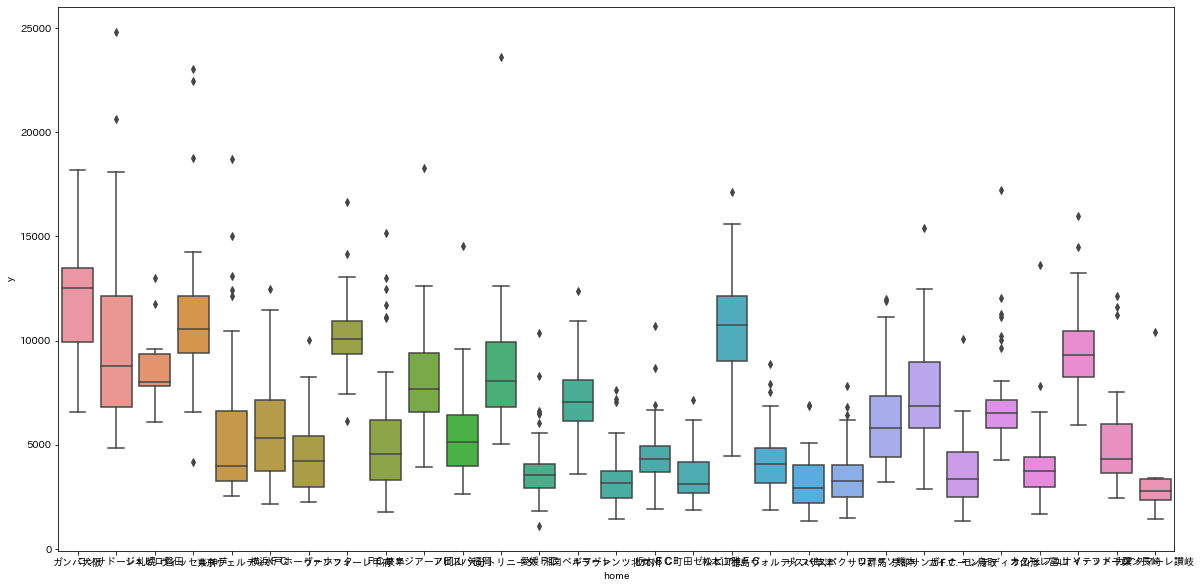

In [ ]:
# home(J2)毎のy
# -> ガンバ大阪などが大きい,
check_y = dat[(dat["data"]=="Train") & (dat["stage"] == "Ｊ２")].copy()
sns.boxplot(x="home", y="y", data=check_y)

### stadium(name)

In [ ]:
# 試合数
# -> 味の素スタジアムが多い
pd.crosstab(dat["stadium"], dat["data"])

data,Test,Train
stadium,,
うまかな・よかなスタジアム,7,45
とりぎんバードスタジアム,0,35
エコパスタジアム,1,5
エディオンスタジアム広島,7,37
キンチョウスタジアム,1,24
ケーズデンキスタジアム水戸,6,47
シティライトスタジアム,9,46
デンカビッグスワンスタジアム,7,37
ニッパツ三ツ沢球技場,9,49


<AxesSubplot:xlabel='stadium', ylabel='y'>

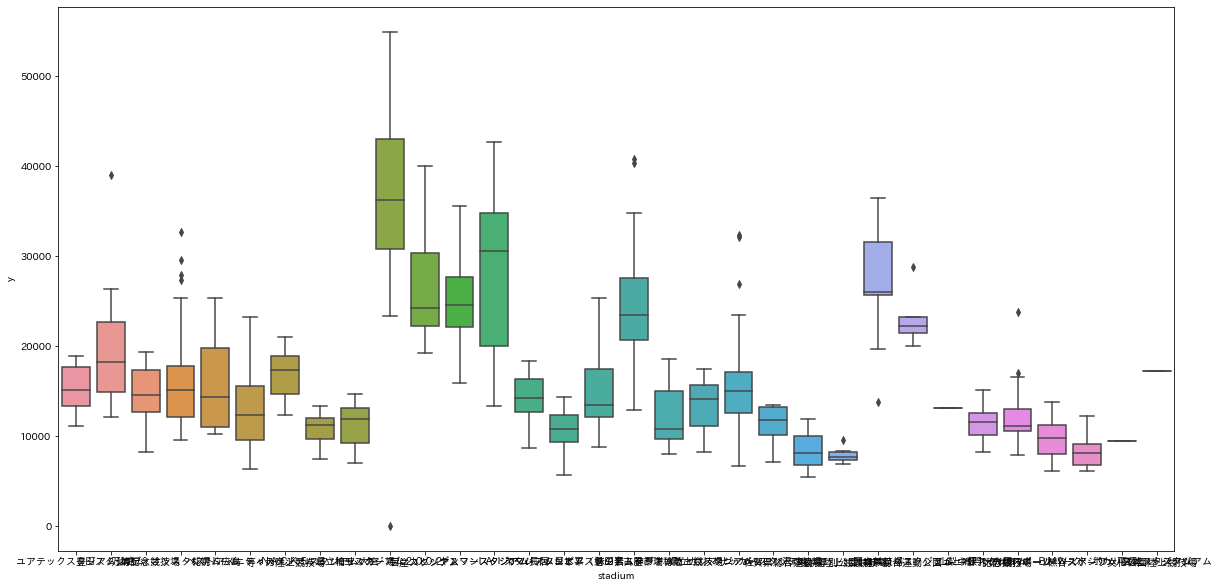

In [ ]:
# stadium毎のy
# -> スタジアムでyの大小傾向あり
check_y = dat[(dat["data"]=="Train") & (dat["stage"] == "Ｊ１")].copy()
sns.boxplot(x="stadium", y="y", data=check_y)

### tv

In [ ]:
dat_tv= dat[["tv", "y", "data", "stage"]].copy()
# テレビ数
dat_tv["tv_num"] = dat_tv["tv"].apply(lambda x: len(x.split("／")))
# ＮＨＫフラグ(ＮＨＫ**)
dat_tv["tv_nhk"] = dat_tv["tv"].apply(lambda x: 1 if "ＮＨＫ" in x else 0)

<AxesSubplot:xlabel='tv_num', ylabel='count'>

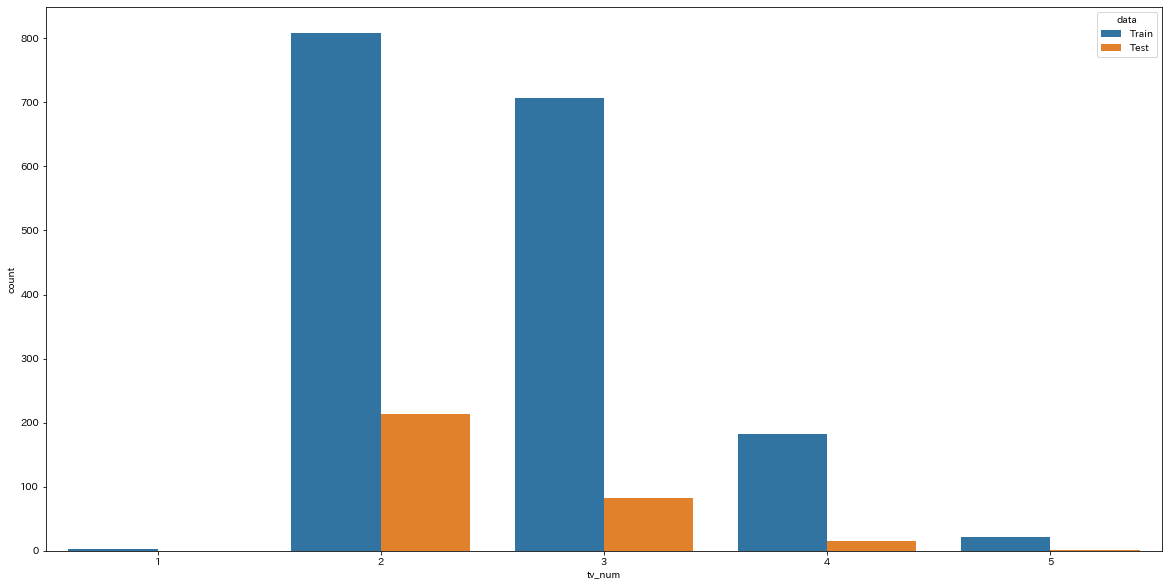

In [ ]:
# テレビ数ごと試合数
sns.countplot(x="tv_num", hue="data",data=dat_tv)

<AxesSubplot:xlabel='tv_nhk', ylabel='count'>

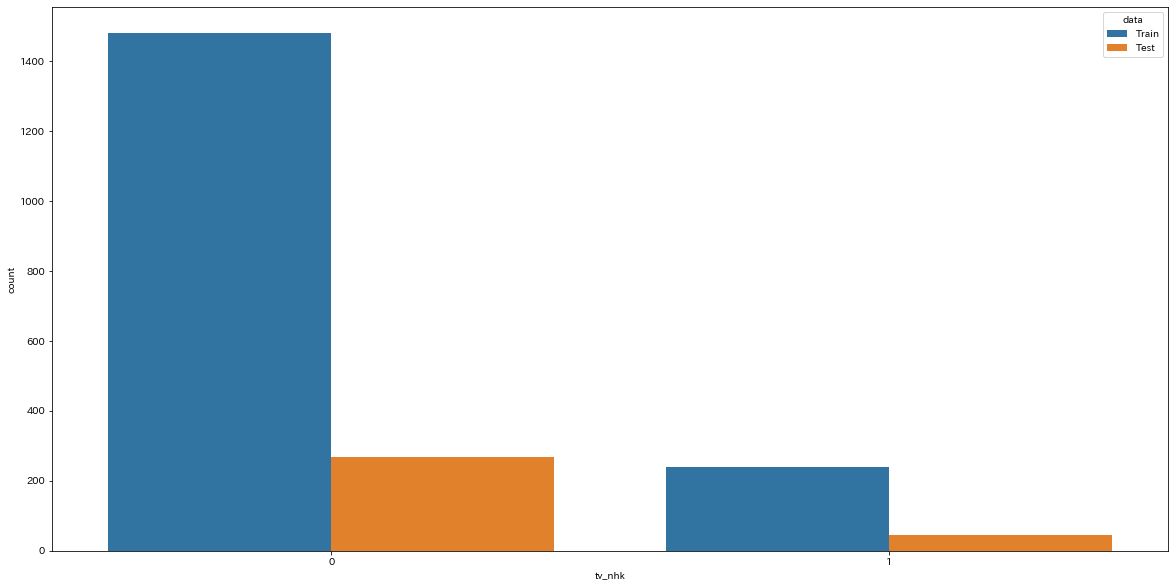

In [ ]:
# NHKフラグごと試合数
sns.countplot(x="tv_nhk", hue="data",data=dat_tv)

<AxesSubplot:xlabel='tv_num', ylabel='y'>

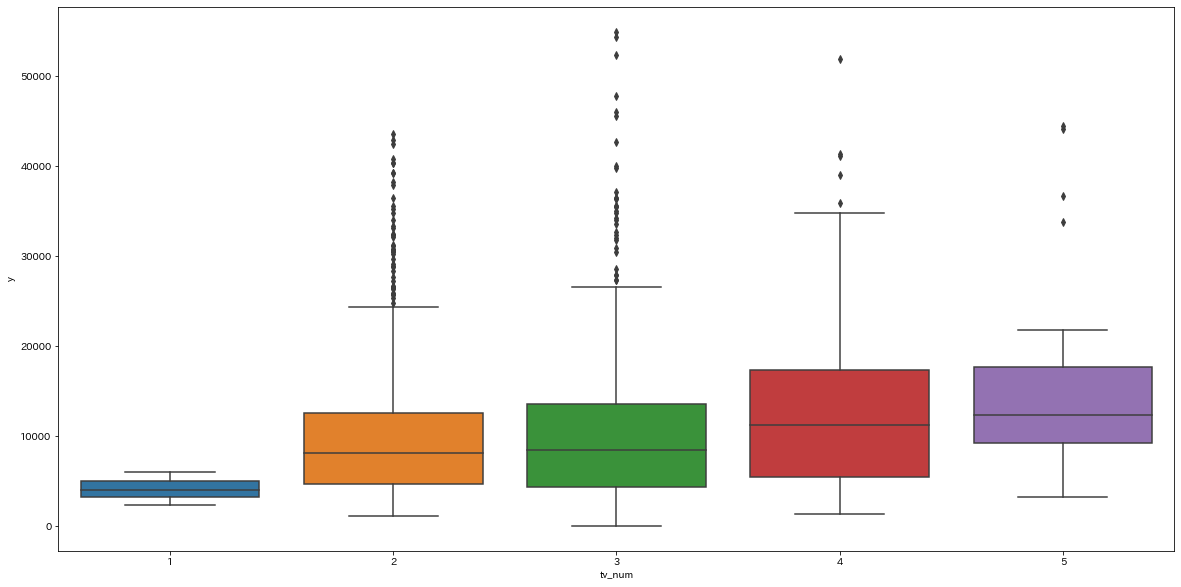

In [ ]:
# tv_num毎のy
# -> テレビ数とyの大小傾向あり
check_y = dat_tv[dat_tv["data"]=="Train"].copy()
sns.boxplot(x="tv_num", y="y", data=check_y)

<AxesSubplot:xlabel='tv_nhk', ylabel='y'>

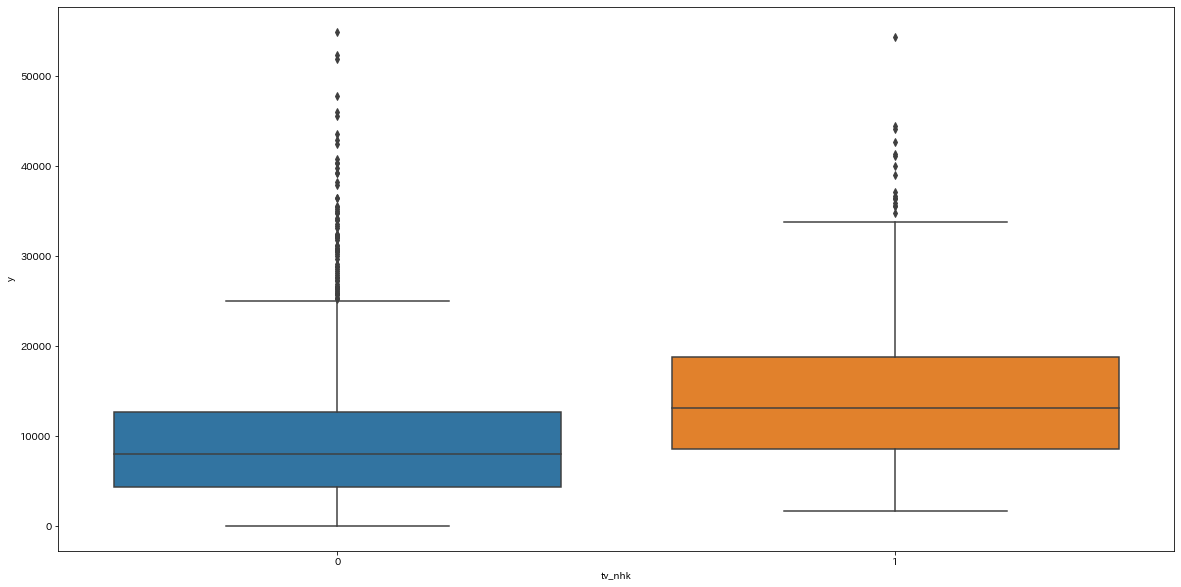

In [ ]:
# nhk毎のy
# -> NHKを含むとyは大きい傾向
check_y = dat_tv[dat_tv["data"]=="Train"].copy()
sns.boxplot(x="tv_nhk", y="y", data=check_y)

### home_score, away_score

<AxesSubplot:xlabel='home_score', ylabel='count'>

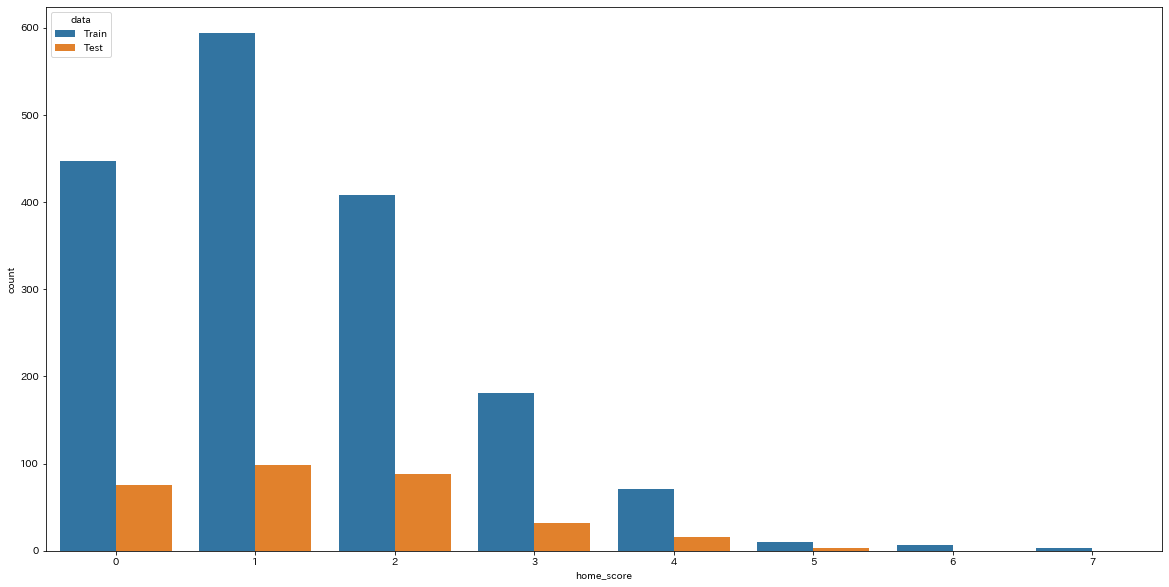

In [ ]:
# home_score毎のデータ数(Train, Testも区別)
sns.countplot(x="home_score", hue="data",data=dat)

<AxesSubplot:xlabel='away_score', ylabel='count'>

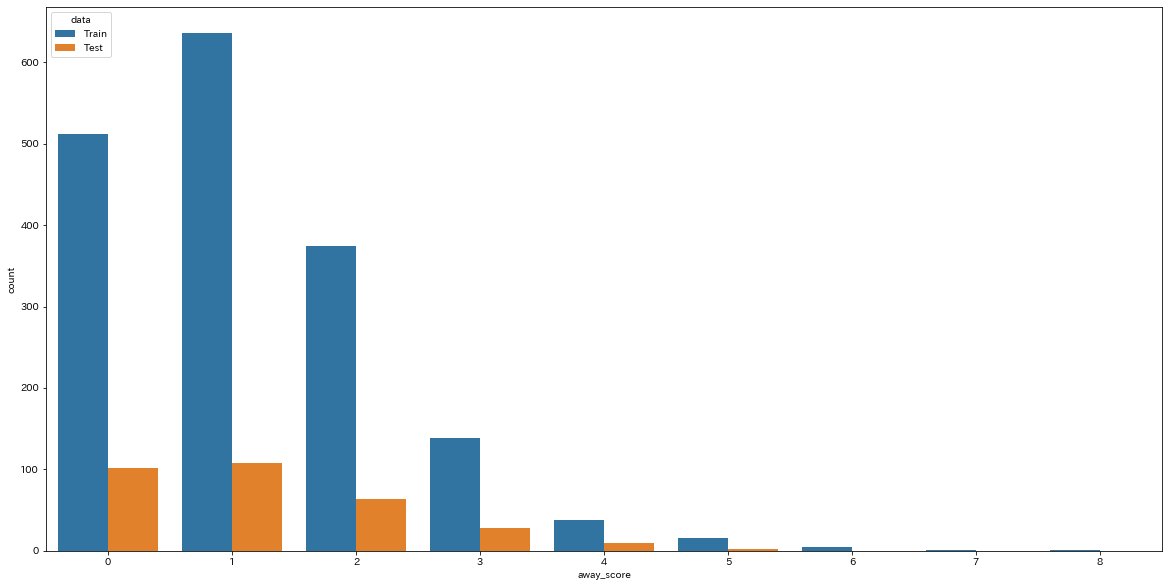

In [ ]:
# away_score毎のデータ数(Train, Testも区別)
sns.countplot(x="away_score", hue="data",data=dat)

<AxesSubplot:xlabel='home_score', ylabel='y'>

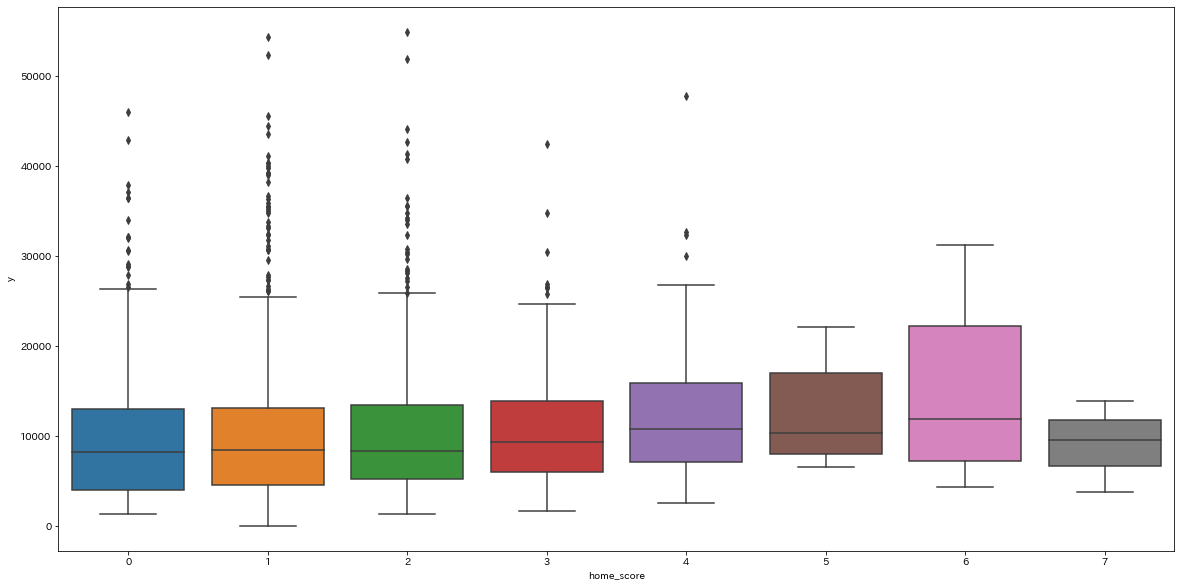

In [ ]:
# home_score毎のy
# ->　若干高得点の試合はyが多い？
check_y = dat[dat["data"]=="Train"].copy()
sns.boxplot(x="home_score", y="y", data=check_y)

<AxesSubplot:xlabel='away_score', ylabel='y'>

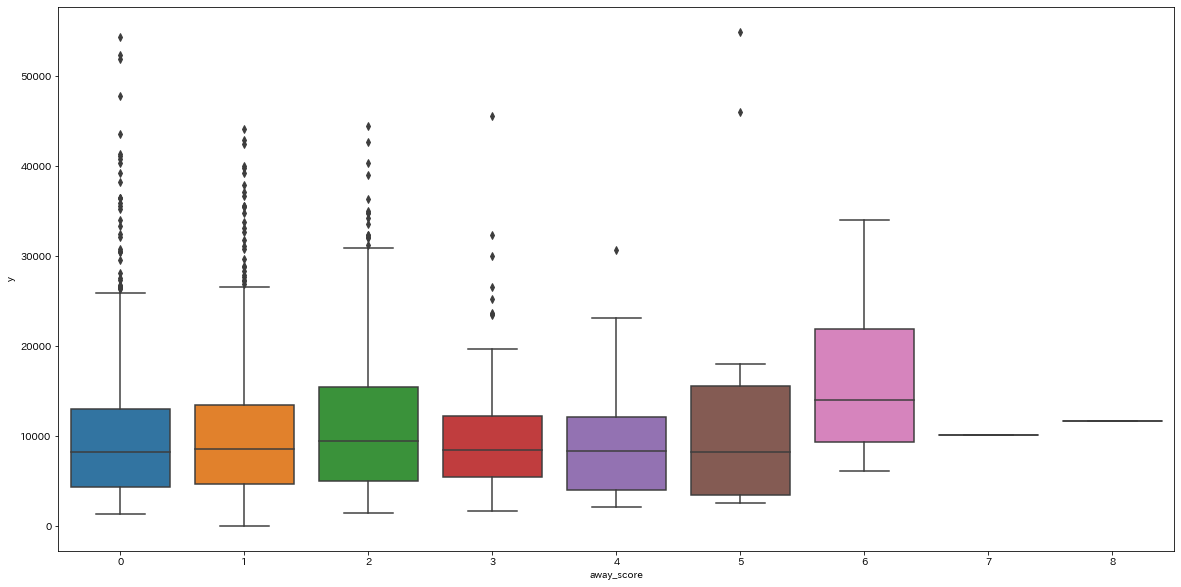

In [ ]:
# away_score毎のy
# ->　若干高得点の試合はyが多い？
check_y = dat[dat["data"]=="Train"].copy()
sns.boxplot(x="away_score", y="y", data=check_y)

### weather, temperature, humidity

In [ ]:
# 天気の種類確認
# 最初の一文字で良さそう
dat["weather"].value_counts()

晴           1002
曇            499
雨            192
屋内            59
曇のち雨          46
雨のち曇          44
晴のち曇          38
曇のち晴          27
曇時々雨          25
晴時々曇          22
曇一時雨          20
曇時々晴          16
晴のち雨           9
晴一時雨           7
雨のち晴           4
雨時々曇           4
晴一時曇           2
晴時々雨           2
曇一時雨のち晴        1
曇のち雪           1
曇一時雷雨のち曇       1
雨のち曇時々晴        1
雪のち雨           1
曇一時晴           1
雨時々晴           1
晴のち雪           1
雨のち曇一時雨        1
曇時々晴一時雨        1
曇一時晴一時雨        1
晴のち曇一時雨        1
晴のち曇時々雨        1
曇のち雷雨          1
晴時々雪           1
曇時々雨のち晴        1
Name: weather, dtype: int64

In [ ]:
dat_wea= dat[["weather", "y", "data", "stage"]].copy()
# 天気まとめる
dat_wea["weather_cate"] = dat_wea["weather"].apply(lambda x: x[0])

<AxesSubplot:xlabel='weather_cate', ylabel='count'>

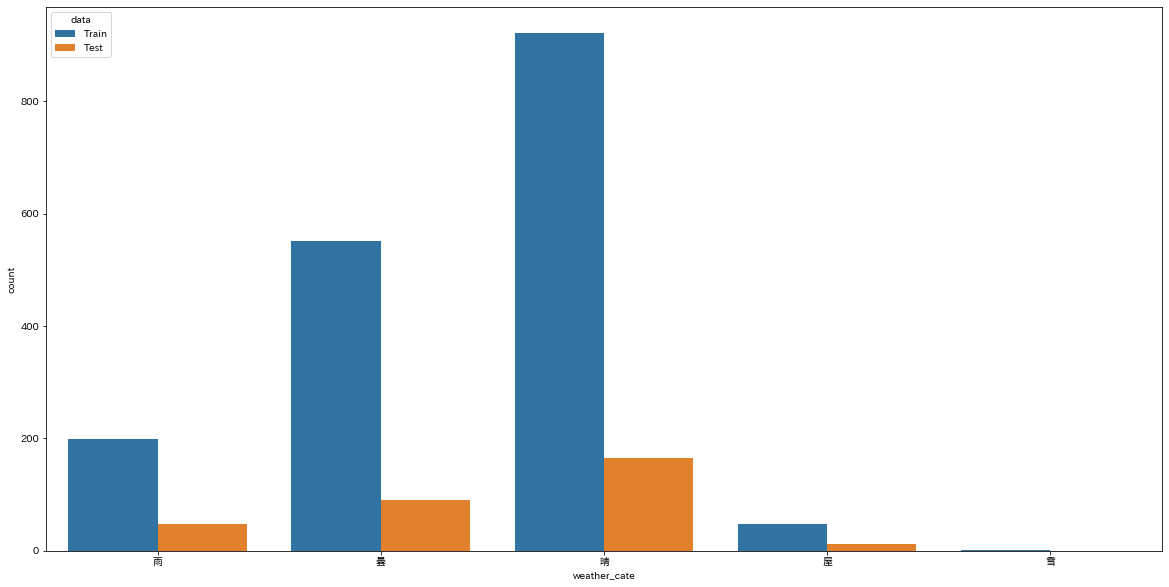

In [ ]:
# weather_cate毎のデータ数(Train, Testも区別)
sns.countplot(x="weather_cate", hue="data",data=dat_wea)

<AxesSubplot:xlabel='weather_cate', ylabel='y'>

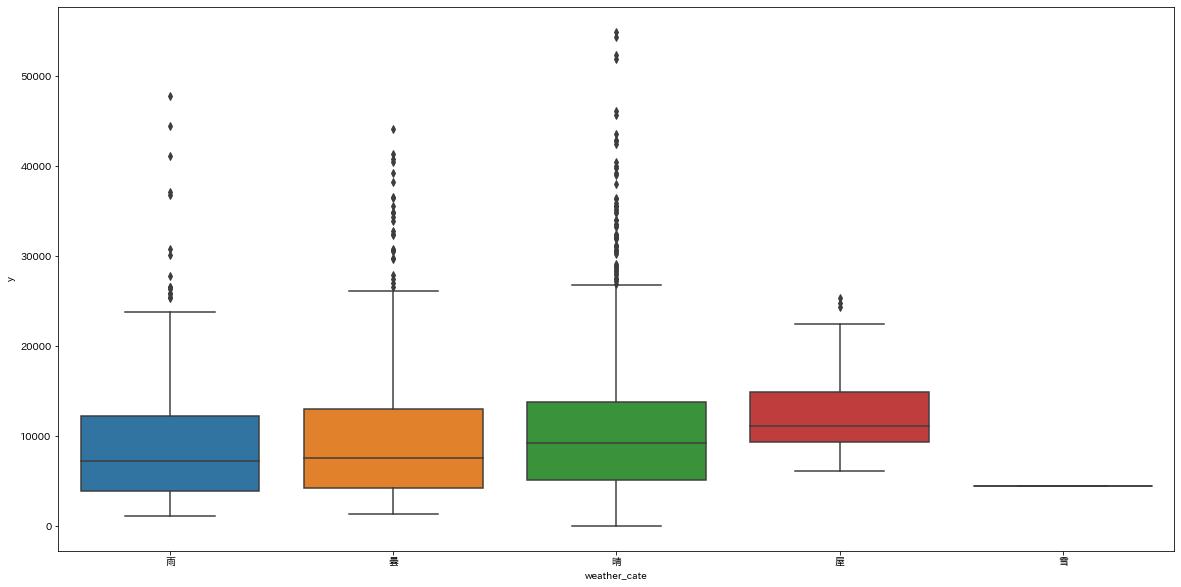

In [ ]:
# weather_cate毎のy
# ->　屋内はyが多い？, 雪はyが少ない
check_y = dat_wea[dat_wea["data"]=="Train"].copy()
sns.boxplot(x="weather_cate", y="y", data=check_y)

### referee

In [ ]:
pd.crosstab(dat["referee"], dat["data"])

data,Test,Train
referee,,
アントニオ アリアス,0,4
クート デービッド,0,2
ケビン フレンド,0,2
シモン マルチニアク,0,1
ジェームズ アドコック,0,1
スティーブン マーティン,0,2
ダーレン デッドマン,0,1
ティアニー ポール,0,2
パベル ラチコフスキ,0,2


<AxesSubplot:xlabel='referee', ylabel='y'>

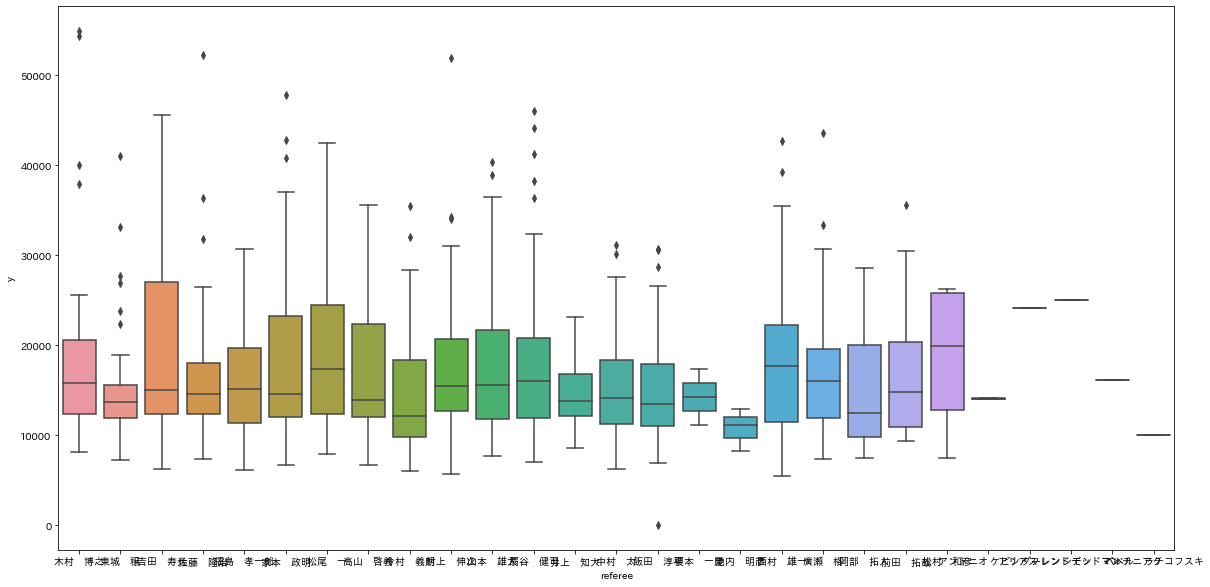

In [ ]:
# referee毎のy(J1)
# ->　あんまり差はない？
check_y = dat[(dat["data"]=="Train") & (dat["stage"] == "Ｊ１")].copy()
sns.boxplot(x="referee", y="y", data=check_y)

<AxesSubplot:xlabel='referee', ylabel='y'>

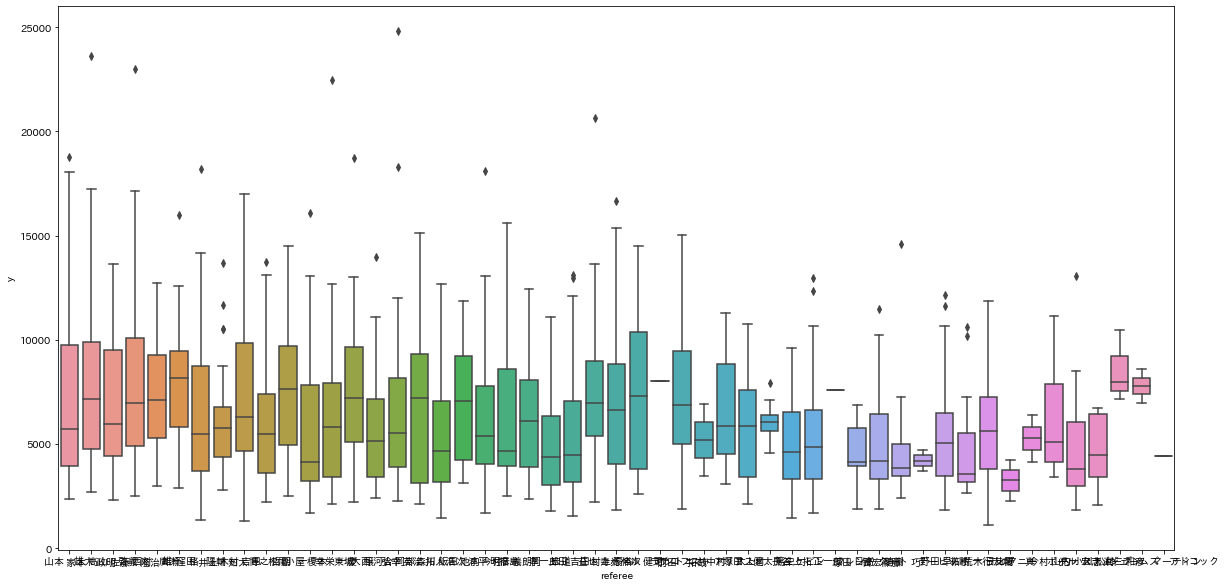

In [ ]:
# referee毎のy(J2)
# ->　あんまり差はない？
check_y = dat[(dat["data"]=="Train") & (dat["stage"] == "Ｊ２")].copy()
sns.boxplot(x="referee", y="y", data=check_y)

### 選手名(home_xxx, away_xxx)

In [ ]:
dat_player = dat[[
    "y", "data", "home", "away",
    "home_01", "home_02", "home_03", "home_04", "home_05",
    "home_06", "home_07", "home_08", "home_09", "home_10", "home_11",
    "away_01", "away_02", "away_03", "away_04", "away_05",
    "away_06", "away_07", "away_08", "away_09", "away_10", "away_11"]].copy()
dat_player = dat_player.melt(id_vars=["y", "data", "home", "away"])
dat_player.head()

,y,data,home,away,variable,value
0,18250.0,Train,ベガルタ仙台,鹿島アントラーズ,home_01,林 卓人
1,11831.0,Train,ベガルタ仙台,大宮アルディージャ,home_01,林 卓人
2,13147.0,Train,ベガルタ仙台,ジュビロ磐田,home_01,林 卓人
3,17192.0,Train,ベガルタ仙台,ＦＣ東京,home_01,林 卓人
4,18525.0,Train,ベガルタ仙台,清水エスパルス,home_01,林 卓人


In [ ]:
# 先発メンバー登場数
pd.crosstab(dat_player["value"], dat_player["data"]).sort_values("Train", ascending=False)

data,Test,Train
value,,
秋元 陽太,16,100
片山 奨典,14,95
佐藤 優也,11,95
飯田 真輝,16,95
南 雄太,17,93
...,...,...
浅野 拓磨,2,0
三浦 弦太,5,0
江口 直生,2,0


In [ ]:
# 先発メンバー毎のyの値(top20)
# ->　チームに引っ張られている？
check_y = dat_player[dat_player["data"]=="Train"].copy().reset_index(drop=False)
top20_home = check_y.groupby(["home", "value"]).agg(
    {"y": np.mean}).sort_values("y", ascending=False).reset_index(drop=False).iloc[0:20,:]
top20_away = check_y.groupby(["away", "value"]).agg(
    {"y": np.mean}).sort_values("y", ascending=False).reset_index(drop=False).iloc[0:20,:]

In [ ]:
top20_home

,home,value,y
0,浦和レッズ,エジノ,54905.0
1,浦和レッズ,扇原 貴宏,54905.0
2,浦和レッズ,山下 達也,54627.5
3,浦和レッズ,南野 拓実,54627.5
4,浦和レッズ,フォルラン,54350.0
5,浦和レッズ,山口 蛍,54350.0
6,浦和レッズ,ゴイコ カチャル,54350.0
7,浦和レッズ,ヤキモフスキー,52293.0
8,浦和レッズ,矢野 貴章,52293.0
9,浦和レッズ,中村 直志,52293.0


In [ ]:
top20_away

,away,value,y
0,セレッソ大阪,山岸 範宏,54905.000000
1,セレッソ大阪,平川 忠亮,54905.000000
2,名古屋グランパス,原口 元気,52293.000000
3,名古屋グランパス,永田 充,52293.000000
4,名古屋グランパス,柏木 陽介,52086.000000
5,名古屋グランパス,梅崎 司,52086.000000
6,名古屋グランパス,鈴木 啓太,52086.000000
7,名古屋グランパス,阿部 勇樹,52086.000000
8,名古屋グランパス,加藤 順大,52086.000000
9,名古屋グランパス,宇賀神 友弥,52086.000000


In [ ]:
# チームごとに選手の平均観客動員数の偏差値(home)
# チーム平均からの乖離がある選手はそこそこいる, 選手人気か？
team_mean_std = check_y[check_y["variable"].str.startswith("home_")].groupby(["home"]).agg(
    {"y": [np.std, np.mean]}).reset_index(drop=False)
team_mean_std.columns = ["home", "y_std", "y_mean"]
player_mean = check_y[check_y["variable"].str.startswith("home_")].groupby(["home", "value"]).agg(
    {"y": np.mean, "data": "count"}).reset_index(drop=False)
player_mean.columns = ["home", "value", "y", "N"]
player_T_score = pd.merge(player_mean, team_mean_std, how="inner", on="home")
player_T_score["T_score"] = 10 * (player_T_score["y"] - player_T_score["y_mean"]) / player_T_score["y_std"] + 50

In [ ]:
# top20名
player_T_score.sort_values("T_score", ascending=False).head(20)

,home,value,y,N,y_std,y_mean,T_score
783,名古屋グランパス,ハーフナー ニッキ,38966.0,1,6251.181942,16449.914286,86.018926
1350,清水エスパルス,犬飼 智也,23188.0,1,2982.527024,14573.512821,78.883182
758,京都サンガF.C.,内野 貴志,13916.0,2,2404.966187,7494.260870,76.701993
1117,柏レイソル,水野 晃樹,25782.5,2,5393.210803,12980.829268,73.736641
49,アルビレックス新潟,小泉 慶,35533.0,1,4958.859812,25248.621622,70.739401
946,徳島ヴォルティス,小暮 大器,9149.0,2,2185.870681,4786.708333,69.956769
1166,栃木ＳＣ,西岡 大輝,7513.5,2,1559.279927,4468.460000,69.528501
950,徳島ヴォルティス,李 栄直,8568.5,2,2185.870681,4786.708333,67.301077
997,愛媛ＦＣ,福田 健二,6612.0,1,1620.069842,3828.568627,67.180934
154,ガイナーレ鳥取,安藤 由翔,6816.5,2,1806.451696,3749.057143,66.980486


In [ ]:
# top20名(N > 5)
player_T_score[player_T_score["N"] > 5].sort_values("T_score", ascending=False).head(20)

,home,value,y,N,y_std,y_mean,T_score
1140,栃木ＳＣ,三都主 アレサンドロ,6601.500000,6,1559.279927,4468.460000,63.679648
1484,ＦＣ岐阜,難波 宏明,9166.142857,7,3110.056955,5406.104167,62.089935
1439,ＦＣ岐阜,ヘニキ,8999.000000,7,3110.056955,5406.104167,61.552508
1450,ＦＣ岐阜,宮沢 正史,8766.100000,10,3110.056955,5406.104167,60.803647
1453,ＦＣ岐阜,川口 能活,8642.454545,11,3110.056955,5406.104167,60.406081
1437,ＦＣ岐阜,ナザリト,8642.454545,11,3110.056955,5406.104167,60.406081
1483,ＦＣ岐阜,阿部 正紀,8539.727273,11,3110.056955,5406.104167,60.075774
818,大分トリニータ,丹野 研太,13884.125000,8,4014.813464,9892.813953,59.941461
1441,ＦＣ岐阜,三都主 アレサンドロ,8496.750000,8,3110.056955,5406.104167,59.937586
457,ジュビロ磐田,ロドリゴ ソウト,15246.125000,8,4130.726256,11168.906977,59.870463


In [ ]:
# 三都主　アレサンドロはTestのawayは無い, Testのhomeは1件あり
dat_player[dat_player["value"] == "三都主　アレサンドロ"]

,y,data,home,away,variable,value
9195,11069.0,Train,ＦＣ岐阜,カマタマーレ讃岐,home_05,三都主 アレサンドロ
9196,7879.0,Train,ＦＣ岐阜,カターレ富山,home_05,三都主 アレサンドロ
9198,5022.0,Train,ＦＣ岐阜,アビスパ福岡,home_05,三都主 アレサンドロ
9199,5460.0,Train,ＦＣ岐阜,栃木ＳＣ,home_05,三都主 アレサンドロ
9201,4330.0,Train,ＦＣ岐阜,ギラヴァンツ北九州,home_05,三都主 アレサンドロ
9202,6060.0,Train,ＦＣ岐阜,京都サンガF.C.,home_05,三都主 アレサンドロ
9203,15138.0,Train,ＦＣ岐阜,ジュビロ磐田,home_05,三都主 アレサンドロ
9204,13016.0,Train,ＦＣ岐阜,Ｖ・ファーレン長崎,home_05,三都主 アレサンドロ
9574,4503.0,Train,栃木ＳＣ,カターレ富山,home_05,三都主 アレサンドロ
9580,10687.0,Train,栃木ＳＣ,ガンバ大阪,home_05,三都主 アレサンドロ


In [ ]:
# 難波　宏明はTestのhomeは7試合出ている
dat_player[dat_player["value"] == "難波　宏明"]

,y,data,home,away,variable,value
19136,7616.0,Train,横浜ＦＣ,湘南ベルマーレ,home_10,難波 宏明
19251,5537.0,Train,水戸ホーリーホック,ザスパクサツ群馬,home_10,難波 宏明
19252,2895.0,Train,水戸ホーリーホック,カターレ富山,home_10,難波 宏明
19253,2584.0,Train,水戸ホーリーホック,愛媛ＦＣ,home_10,難波 宏明
19255,2648.0,Train,水戸ホーリーホック,ジェフユナイテッド千葉,home_10,難波 宏明
19263,2826.0,Train,水戸ホーリーホック,アビスパ福岡,home_10,難波 宏明
19268,4773.0,Train,水戸ホーリーホック,東京ヴェルディ,home_10,難波 宏明
19269,8266.0,Train,水戸ホーリーホック,京都サンガF.C.,home_10,難波 宏明
19365,11069.0,Train,ＦＣ岐阜,カマタマーレ讃岐,home_10,難波 宏明
19366,7879.0,Train,ＦＣ岐阜,カターレ富山,home_10,難波 宏明


### address
　略.

### capa

<AxesSubplot:xlabel='capa', ylabel='count'>

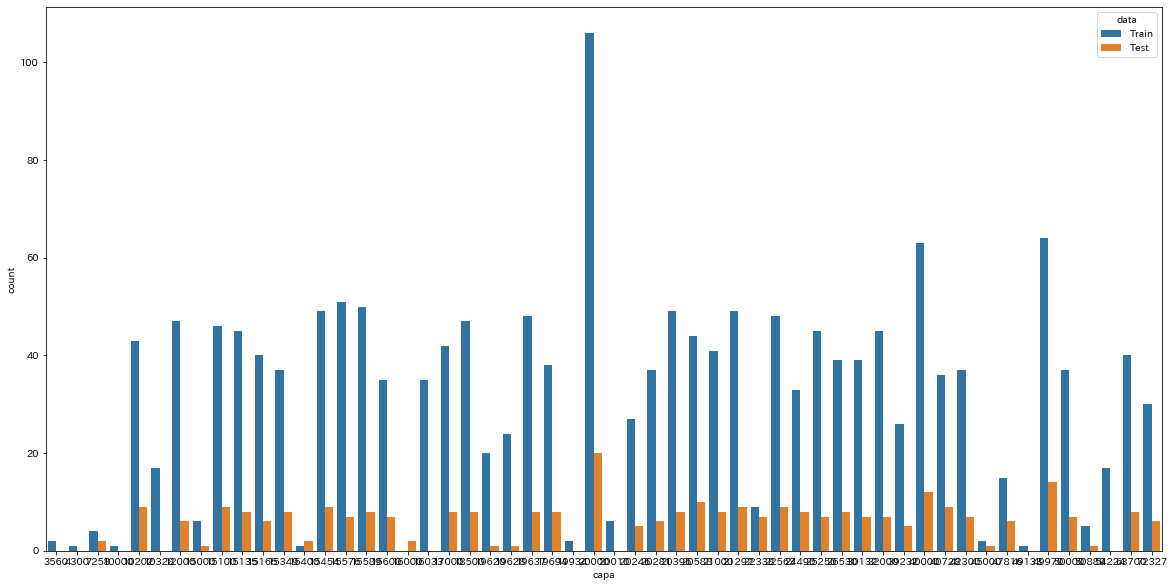

In [ ]:
# capa毎のデータ数(Train, Testも区別)
sns.countplot(x="capa", hue="data",data=dat)

<AxesSubplot:xlabel='capa', ylabel='y'>

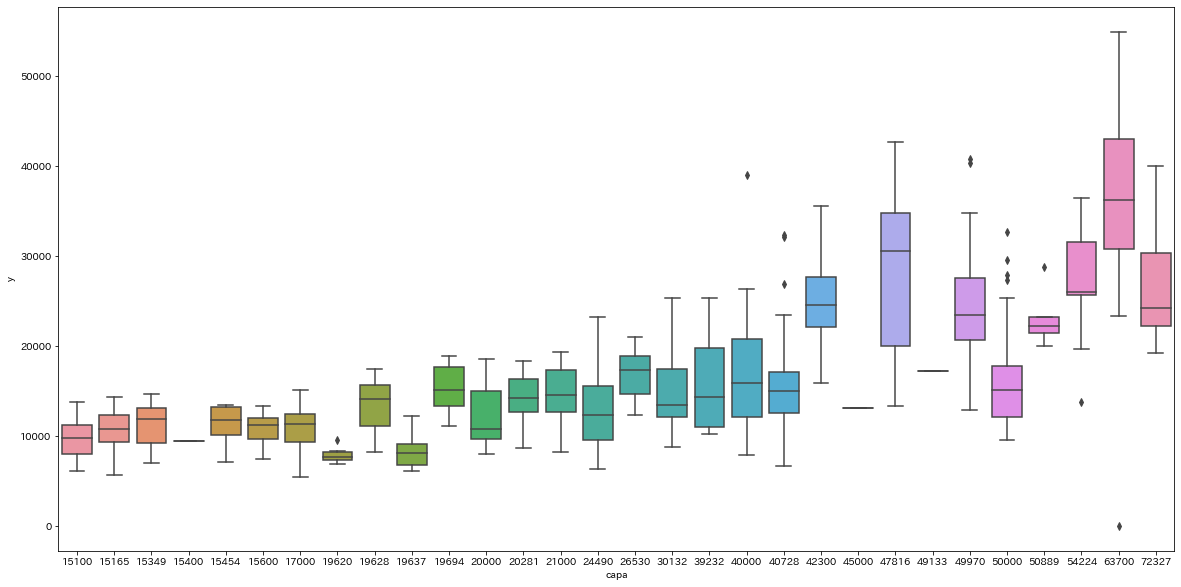

In [ ]:
# capa毎のy(J1)
# ->　capa=50000は低い？
check_y = dat[(dat["data"]=="Train") & (dat["stage"] == "Ｊ１")].copy()
sns.boxplot(x="capa", y="y", data=check_y)

<AxesSubplot:xlabel='capa', ylabel='y'>

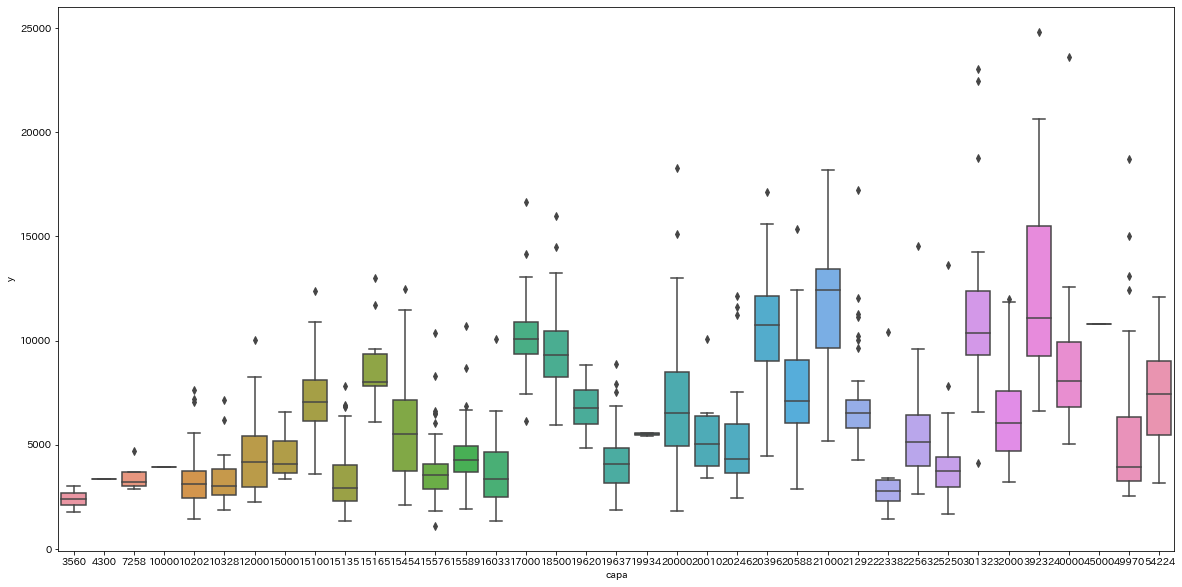

In [ ]:
# capa毎のy(J2)
# ->　あんまり連動しない？
check_y = dat[(dat["data"]=="Train") & (dat["stage"] == "Ｊ２")].copy()
sns.boxplot(x="capa", y="y", data=check_y)